In [ ]:
! pip install gensim


In [ ]:
import pandas as pd

url="https://raw.githubusercontent.com/lichengrui/glassdoor_scraping/main/data.csv"
df=pd.read_csv(url)
df = df.drop(columns=["Unnamed: 0"])
df = df.dropna(how='all')
display(df)

In [25]:
sentences = df["conwords"].tolist()

[nan]

C:\Users\R\AppData\Local\Temp\ipykernel_8036\2556842055.py:7: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df_grouped = df_sorted.groupby(df_sorted['date'].dt.week).count()


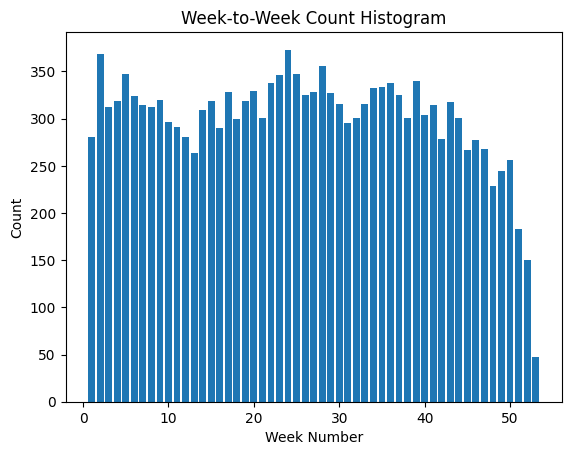

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
# Example DataFrame with a column named 'date'
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime format
# Assuming the 'date' column is already in datetime format
df_sorted = df.sort_values(by='date')
df_grouped = df_sorted.groupby(df_sorted['date'].dt.week).count()
plt.bar(df_grouped.index, df_grouped['date'])
plt.xlabel('Week Number')
plt.ylabel('Count')
plt.title('Week-to-Week Count Histogram')
plt.show()


In [ ]:
import pandas as pd
import gensim
from gensim import corpora
from gensim.utils import simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS

# Sample DataFrame with a column of sentences


# Preprocess the sentences - tokenize and remove stop words
def preprocess_sentence(sentence):
    return [token for token in simple_preprocess(sentence) if token not in STOPWORDS]

df['processed_conwords'] = df['conwords'].apply(preprocess_sentence)

# Create a dictionary and a corpus (bag-of-words representation)
dictionary = corpora.Dictionary(df['processed_conwords'])
corpus = [dictionary.doc2bow(sentence) for sentence in df['processed_conwords']]

# Build the LDA model
num_topics = 10  # Set the number of topics
lda_model = gensim.models.LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=10)

# Apply the LDA model to determine the topic for each sentence
def get_topic(sentence):
    sentence_bow = dictionary.doc2bow(sentence)
    topic_probabilities = lda_model.get_document_topics(sentence_bow)
    topic_index_with_highest_prob = max(topic_probabilities, key=lambda x: x[1])[0]
    return topic_index_with_highest_prob + 1

df['topic'] = df['processed_conwords'].apply(get_topic)

# Print the DataFrame with topics
display(df)

In [51]:
df["topic"].value_counts()

7     2597
2     2036
1     1774
10    1715
8     1669
3     1663
9     1305
4     1234
5     1102
6      800
Name: topic, dtype: int64